# **CLASS ACTIVITY 2**
Nama : M. Arief Rahman Hakim \
NIM  : 122140083

# **INSTRUKSI**

- Lakukan analisis FFT pada sinyal yang telah diberikan kepada anda
- Terhadap 1 sinyal yang paling dominan dalam FFT, lakukan band pass filter pada sinyal tersebut
- Tuliskan analisisnya dan plot seluruh proses yang telah dilakukan

## **PENYELESAIN**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

file_path = 'signal_122140083.csv'
data = pd.read_csv(file_path)
print(data.head())

       time  amplitude
0  0.000000   0.424656
1  0.001000   1.086811
2  0.002000   3.817920
3  0.003001   5.083774
4  0.004001   5.870538


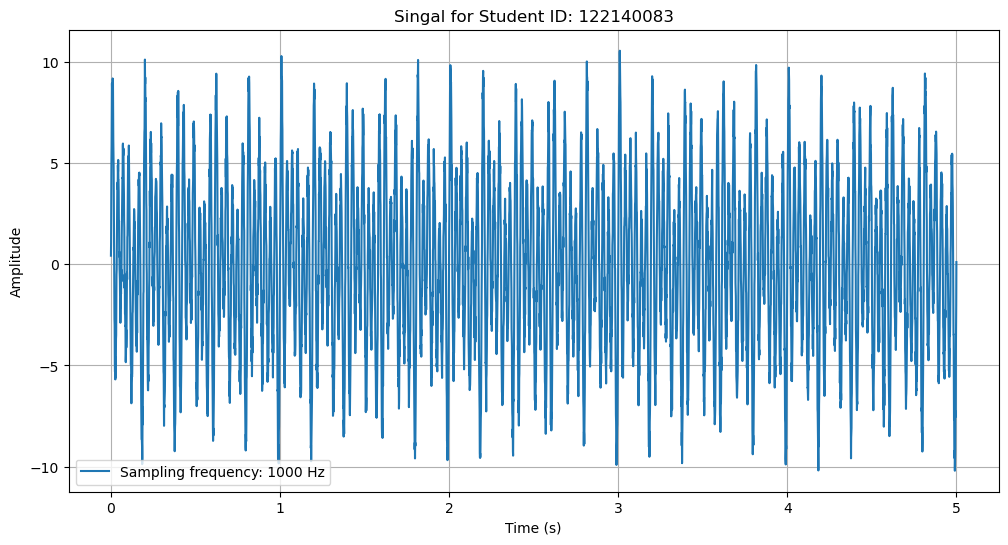

In [ ]:
time = data.iloc[:, 0].values
amplitude = data.iloc[:, 1].values

plt.figure(figsize=(12, 6))
plt.plot(time, amplitude, label='Sampling frequency: 1000 Hz')
plt.title('Singal for Student ID: 122140083')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


Number of samples: 5000
FFT computation time: 0:00:00


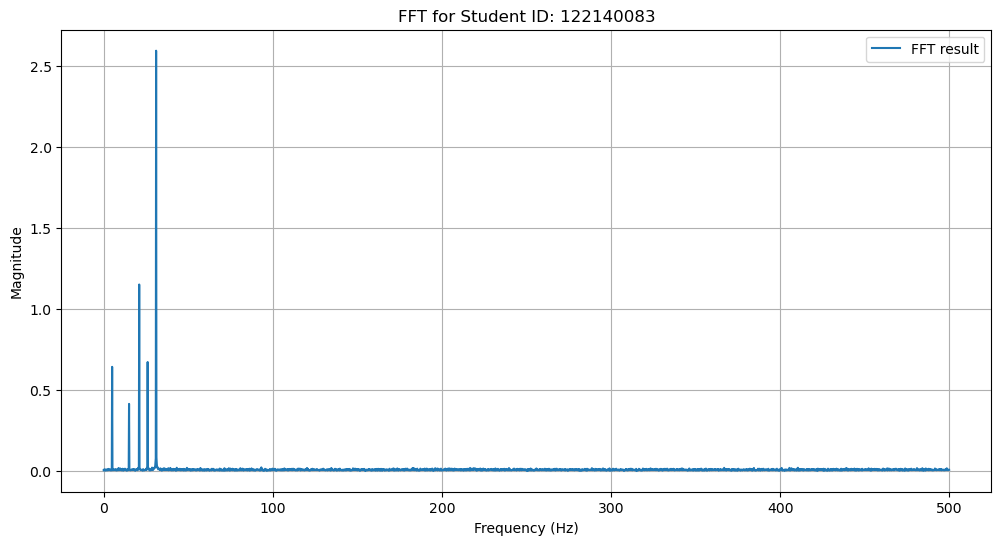

In [6]:
N = len(amplitude)
print(f"Number of samples: {N}")

waktu_mulai_fft = dt.datetime.now()
fft_result = np.fft.fft(amplitude)
waktu_akhir_fft = dt.datetime.now()

fft_magnitude = np.abs(fft_result[:N//2]/N)

plotting_freq = np.fft.fftfreq(N, d=1/1000)[:N//2]

print(f"FFT computation time: {waktu_akhir_fft - waktu_mulai_fft}")

plt.figure(figsize=(12, 6))
plt.plot(plotting_freq, fft_magnitude, label='FFT result')
plt.title('FFT for Student ID: 122140083')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


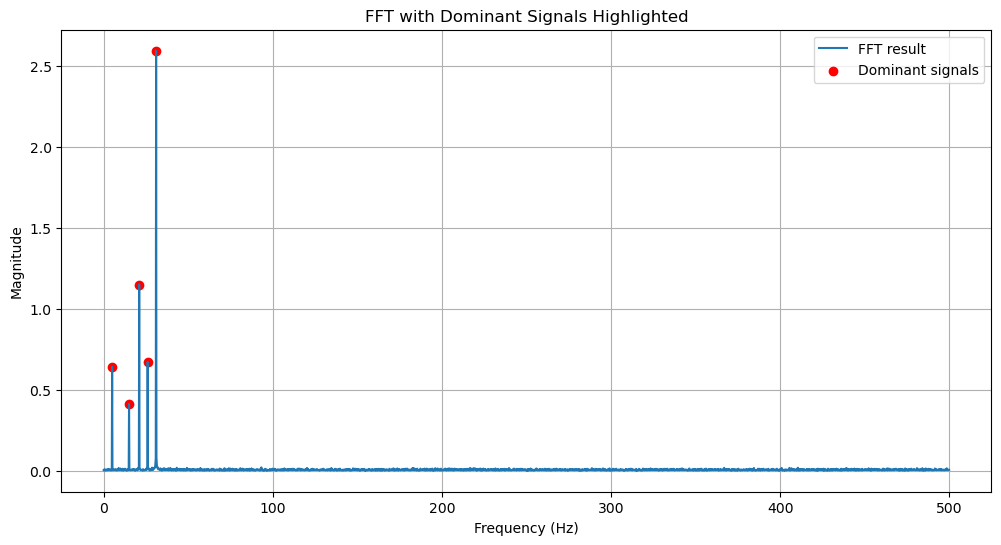

Dominant frequencies (Hz): [ 5. 15. 21. 26. 31.]


In [7]:
from scipy.signal import find_peaks

# Cari puncak pada magnitudo FFT
peaks, _ = find_peaks(fft_magnitude, height=0.1)  # threshold height untuk mendeteksi puncak
dominant_frequencies = plotting_freq[peaks]
dominant_magnitudes = fft_magnitude[peaks]

# Plot FFT dengan warna pada sinyal dominan
plt.figure(figsize=(12, 6))
plt.plot(plotting_freq, fft_magnitude, label='FFT result')
plt.scatter(dominant_frequencies, dominant_magnitudes, color='red', label='Dominant signals')
plt.title('FFT with Dominant Signals Highlighted')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Tampilkan frekuensi dominan
print("Dominant frequencies (Hz):", dominant_frequencies)

Dari hasil diatas, dapat disimpulkan bahwa terdapat 4 sinyal dominan dalam sinyal dengan ID: 122140083. Berikut adalah frekuensi sinyal tersebut: 
- 5 Hz
- 15 Hz
- 21 Hz
- 26 Hz
- 31 Hz

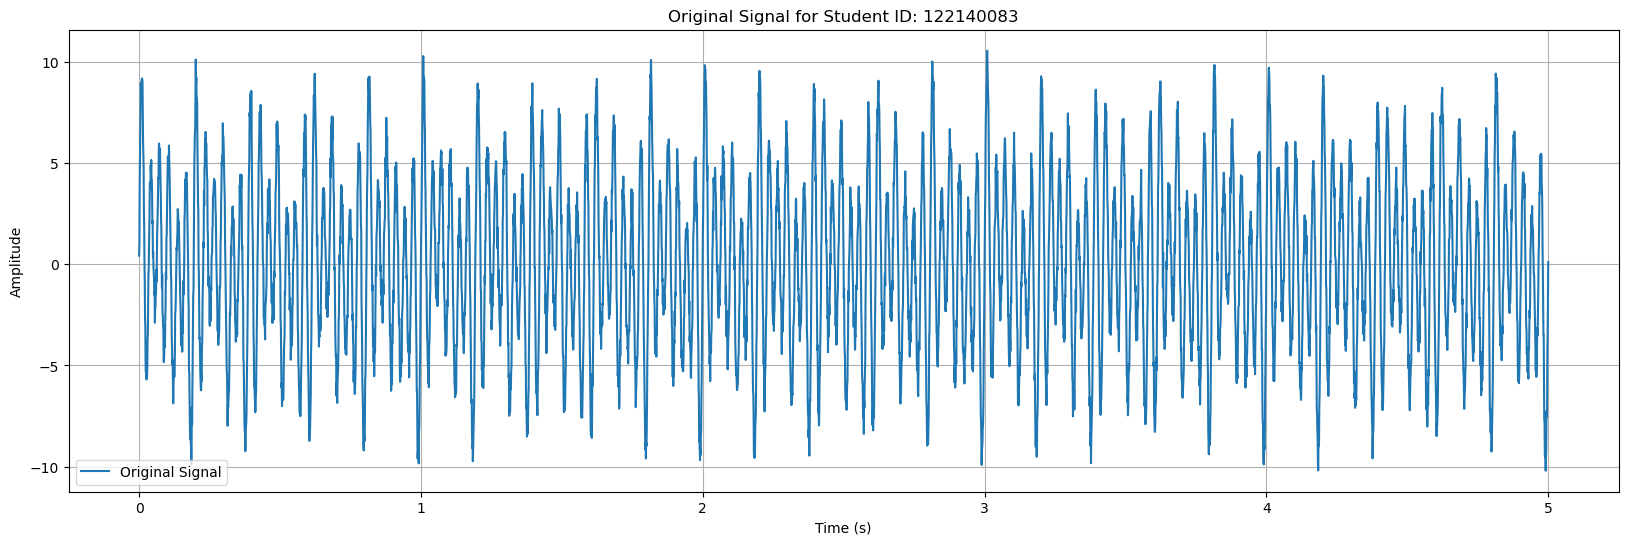

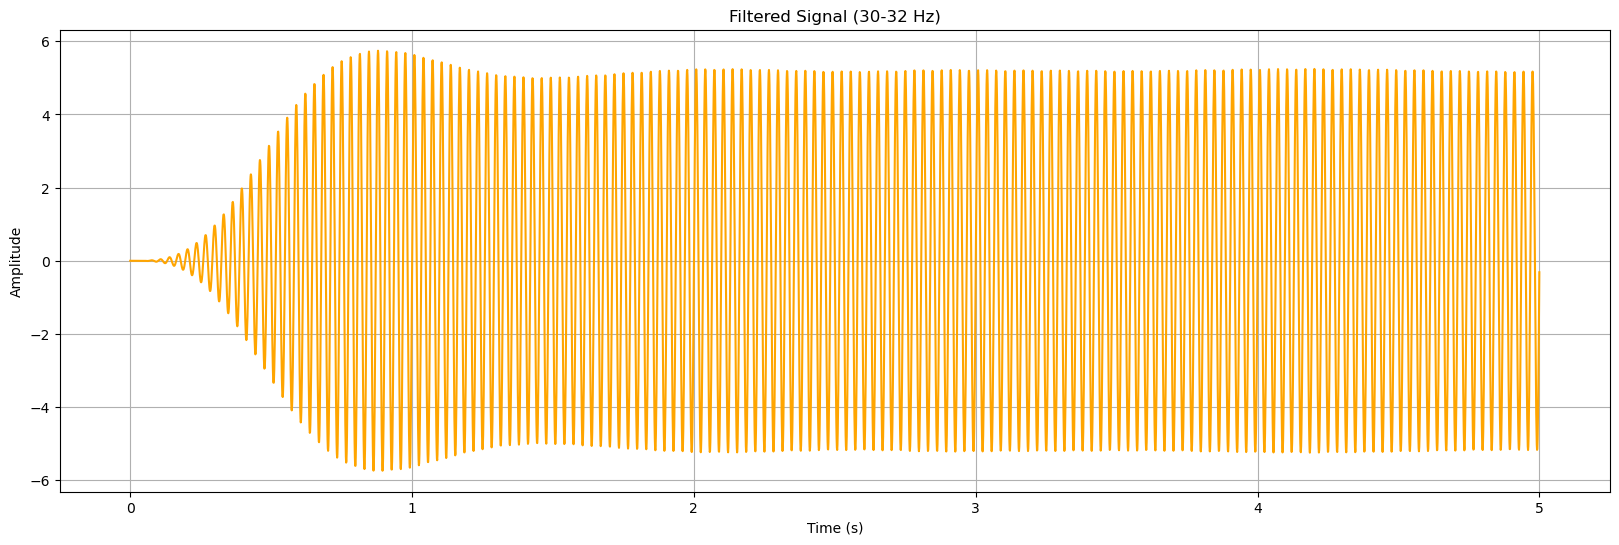

In [16]:
# bandpass filter  diantara 31 hz
from scipy.signal import butter, lfilter

lowcut_freq = 30
highcut_freq = 32

b, a = butter(4, [lowcut_freq, highcut_freq], fs=1000, btype='band')
filtered_signal = lfilter(b, a, amplitude)

# Original signal
plt.figure(figsize=(20, 6))
plt.plot(time, amplitude, label='Original Signal')
plt.title('Original Signal for Student ID: 122140083')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# Filtered signal
plt.figure(figsize=(20, 6))
plt.plot(time, filtered_signal, color='orange')
plt.title('Filtered Signal (30-32 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()





## **Hasil Analisis**

Berikut adalah rangkuman hasil analisis FFT pada signal dengan ID: 122140083, dan penerapan bandpass filter untuk mempertahankan sinyal tersebut:
1. **Analisi FFT**\
    Langkah awal dilakukan penerapan FFT pada signal `ID 122140083` menggunakan library yang tersedia. Hasil FFT menunjukkan terdapat 5 puncak artinya, terdapat 5 signal dominan yaitu:
    - 5 Hz
    - 15 Hz
    - 21 Hz
    - 26 Hz
    - 31 Hz

    Puncak frekuensi dominan pada 31 Hz menunjukkan bahwa ini adalah komponen utama dalam sinyal tersebut, dan dapat dianggap sebagai frekuensi yang relevan untuk dipertahankan.
2. **Penerapan Bandpass Filter**\
    Kemudian dilakukan bandpass filter terhadap 1 signal yang paling dominan yaitu 31 Hz.\
    Rentang filter yang digunakan, lowcut = 30 Hz dan highcut = 32Hz. Mengapa?

    Penentuan Rentang Frekuensi untuk Filter pada 31 Hz

    Rentang Frekuensi yang Diinginkan
    Untuk memfokuskan filter pada 31 Hz, Kita perlu memilih rentang frekuensi yang cukup sempit di sekitar 31 Hz untuk meminimalkan gangguan dari frekuensi lain, namun cukup lebar agar sinyal tetap utuh. Rentang ini sering kali ditentukan dengan sedikit menambahkan jarak di bawah dan di atas frekuensi dominan.

    Penentuan Lowcut dan Highcut

    - **Lowcut**: Pilih sedikit di bawah 31 Hz, misalnya 30 Hz.
    - **Highcut**: Pilih sedikit di atas 31 Hz, misalnya 32 Hz.

    Dengan memilih rentang ini, Kita akan menyoroti frekuensi sekitar 31 Hz dan memfilter sinyal lain di luar rentang tersebut.

    Rekomendasi Nilai:
    - **Lowcut**: 30 Hz
    - **Highcut**: 32 Hz

    Ini adalah rentang frekuensi yang cukup sempit, yang hanya akan mempertahankan sinyal yang berfokus pada 31 Hz, dan memfilter frekuensi lain yang tidak relevan.

    Mengapa Memilih Rentang Ini?
    - **Rentang Sempit**: Memilih rentang yang sempit akan memungkinkan sinyal dominan di sekitar 31 Hz untuk tetap utuh, tanpa terlalu banyak mempengaruhi amplitudo atau bentuk sinyal.
    - **Minimalkan Gangguan dari Frekuensi Lain**: Rentang sempit akan memfilter noise atau komponen frekuensi lain yang tidak relevan di luar 30-32 Hz, sehingga Anda bisa mendapatkan sinyal yang lebih bersih.





3. **Hasil Filter**\
    Setelah dilakukan bandpass filter, sinyal yang difilter menunjukkan yang lebih bersih di ekitar 31 Hz, dengan noise dan frekuensi lainnya yang tereduksi atau dihilangkan.\
    Hasil sinyal yang difilter juga menunjukkan amplitudo yang lebih stabil di sekitar 31 Hz, tanpa  ganggunan dari komponen frekuensi lainnya yang tidak relevan.


## **Referensi**

1. Percakapan dengan AI: 
- [GPT](https://chatgpt.com/share/6810599e-3af0-800a-b833-6ce0007e5daf)
- [Copilot](https://drive.google.com/drive/folders/1qgp8MqtA07czBGas17dh8MLRPKFLTsfK?usp=sharing)
2. Perkuliahan 6 [Github](https://github.com/informatika-itera/if3024-handson/blob/main/2025-notebooks/6_lecturing_dft.ipynb)